# Machine learning from scratch: K means

## Introduction

In this notebook we will investigate the algorithm of K means. This is an unsupervised algorithm used for clustering, based on the idea that we can find centers for the clusters so that the average distance from the points to their clusters center is minimal. We start by importing the scientific libraries. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

For the algorithm to properly work, we have to make certain assumptions about the type of datasets that we will be interested in studying. We assume:
- The clusters have a roughly spherical shape
- All variables have the same variance
- All the clusters have roughly the same number of points. 


Let us generate some data with such characteristics. We generate $3$ clouds of multivariate normally distributed points with given means and covariance matrices.

In [2]:
num_observations = 200
x0 = np.random.multivariate_normal([-1, 0], [[1, .75],[.75, 1]], num_observations)
x1 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([4, 2], [[1, .75],[.75, 1]], num_observations)

X =  np.vstack((x0,x1,x2))

We now plot the dataset: 

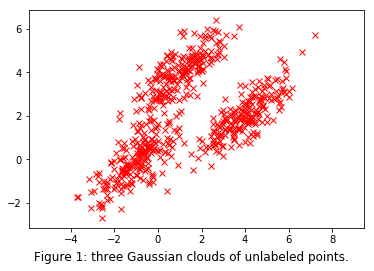

In [3]:
plt.plot(X[:,0],X[:,1],'x',color='red')
plt.figtext(0.5, 0.01, 'Figure 1: three Gaussian clouds of unlabeled points.',
            wrap=True, horizontalalignment='center', fontsize=12)
plt.axis('equal')
plt.show()

## The model

Suppose we have a dataset $\{x^{(1)},\dots,x^{(m)} \}$ and we are trying to find $k$ different clusters, $C_1,\dots,C_k$. As mentioned in the introduction, the idea of the algorithm is to find centroids $\mu_1,\dots,\mu_k$ such that the average distance from a point to its assigned centroid is minimal. More precisely, if we write $\mu_{x^{(i)}}$ for the cluster assigned to the point $x^{(i)}$, we want to minimize 

$$
\displaystyle\sum_{i=1}^{m} \| x^{(i)} - \mu_{x^{(i)}} \|^2 = \sum_{j=1}^k |C_j|\ \text{var}(C_j),
$$

where $\text{var}(C_j)$ is the variance of the distances of the elements of a cluster to its centroid. To find such centroids, we will start with a random assignment of clusters, proceed to compute the centroids of such clusters, and then reassign the clusters according to the distance to the centroids. If we keep computing the centroids and reassigning clusters, the algorithm will (hopefully) converge to a local minimum. We summarize the algorithm as follows:

\begin{align*}
& 1. \  \text{intialize clusters to a random assignment}\\
& 2. \ \text{for } i = 1\dots \text{ num_steps do}  \\
& \qquad 2a. \ \text{compute the centroid of each cluster }\\
& \qquad 2b. \ \text{assign to each point the cluster with the closest centroid } \\
& 3. \ \text{return clusters} 
\end{align*}






## Implementation

Now we proceed to implement the algorithm for K means. Our algorithm will have as input, the dataset in form of a matrix $X$ of which each row represents a point of data, the number of clusters $k$ that we want to find, and the number of times we are going to iterate our algorithm. We will augment our matrix $X$ to a matrix $M$ with an extra column, indicating the cluster assigned to each point of our dataset. In this implementation we prefer **not** to vectorize to make it more clear. This implies that we will have several nested loops. The first one ranges through the total number of iterations, the second one ranges over all the points, and the third one over all the clusters. Thus, in every iteration, we pick a point, compute its distance to all of the centroids, and assigns to such point the cluster corresponding to the minimum distance.

In [4]:
def kmeans(X,k,num_iter):
    M = np.hstack([X,(np.random.randint(0,k, X.shape[0])).reshape(-1,1)])
    centroids = [(np.sum(M[np.where(M[:,-1] == i)],axis=0)/X.shape[0])[0:-1] for i in range(k)]
    for k in range(num_iter):
        for i in range(X.shape[0]):
            for j in range(len(centroids)):
                if np.linalg.norm(M[i,0:-1]-centroids[j]) < np.linalg.norm(M[i,0:-1]-centroids[int(M[i,-1])]):
                    M[i,-1] = j
        for s in range(len(centroids)):
            centroids[s] = np.average(M[np.where(M[:,-1] == s)],axis=0)[0:-1]
    return M

Now we can test our algorithm with the dataset we generated in the introduction. We set the number of clusters to $3$ and the number of iterations to $50$.

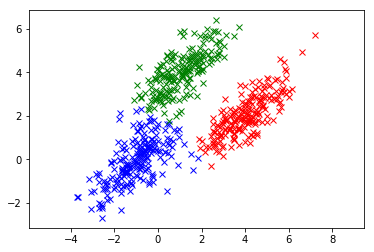

In [5]:
#The algorithm returns the dataset with the extra column corresponding to the cluster
M = kmeans(X,3,50)

#Now we filter each of the clusters
R_x,R_y = M[np.where(M[:,2] == 0)][:,0] , M[np.where(M[:,2] == 0)][:,1]
B_x,B_y = M[np.where(M[:,2] == 1)][:,0] , M[np.where(M[:,2] == 1)][:,1]
G_x,G_y = M[np.where(M[:,2] == 2)][:,0] , M[np.where(M[:,2] == 2)][:,1]

#Now we plot the data
plt.plot(R_x,R_y,'ro',marker='x',color='red')
plt.plot(B_x,B_y,'ro',marker='x',color='blue')
plt.plot(G_x,G_y,'ro',marker='x',color='green')
plt.axis('equal')
plt.show()

We can see that the algorithm does a good job classifying the three different clusters. It is worth mentioning that it might happen that after a cluster reassignment, some of the clusters are empty. A detailed explanation can be found [here](http://user.ceng.metu.edu.tr/~tcan/ceng465_f1314/Schedule/KMeansEmpty.html). Let us see with an example how can this situation occur. Let us generate a dataset which follows a linear trend, plus some normally distributed noise.

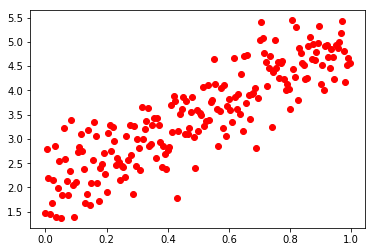

In [6]:
#set the number of observations
num_obs = 200

#We generate random data that follows approximately a straight line with
#known parameters and known fluctuations
X = np.arange(0,1,1/num_obs)
y = 3*X + 2

#Now we add the random fluctuations
noise = np.random.normal(0,0.5,num_obs)
y = y + noise

#We stack the two coordinates of our points in a single matrix
T = np.hstack([X.reshape(-1,1),y.reshape(-1,1)])

#Now we plot the data
plt.plot(X,y,'ro')
plt.show()

Now we run the algorithm with $k=3$ and try to plot the results.

/Users/fp16987/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/fp16987/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


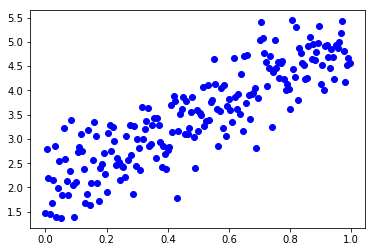

In [7]:
M = kmeans(T,3,20)

R_x , R_y = M[np.where(M[:,2] == 0)][:,0] , M[np.where(M[:,2] == 0)][:,1]
B_x , B_y = M[np.where(M[:,2] == 1)][:,0] , M[np.where(M[:,2] == 1)][:,1]
G_x , G_y = M[np.where(M[:,2] == 2)][:,0] , M[np.where(M[:,2] == 2)][:,1]

#Now we plot the data
plt.plot(R_x,R_y,'ro',color='red')
plt.plot(B_x,B_y,'ro',color='blue')
plt.plot(G_x,G_y,'ro',color='green')
plt.show()

If we run the previous snippet several times, we will observe different behaviors, as the algorithm will find solutions with $1,2$ or $3$ clusters. This occurs because the function we are trying to optimize does not have good convexity properties when the dataset does not satisfies the assumptions mentioned in the introduction. This problem can be tricky, as for higher dimensional datasets, checking such assumptions can be a hard problem to tackle. We finish this notebook by mentioning the [following article](http://varianceexplained.org/r/kmeans-free-lunch/) in which the author analyzes different situations where the K-means algorithm does not perform well, and its implications to the [No Free Lunch Theorem](https://en.wikipedia.org/wiki/No_free_lunch_theorem).